# Forecasting Walmart Sales

> **We'll train 2 different machine learning models** to predict sales, based on historic sales data, given information like:
- `Store` - the store number
- `Dept` - the department (Clothing, Shoes & Accessories; Books; Movies & TV Shows and so on...) number
- `Date` - the week
- `Weekly_Sales` -  sales for the given department in the given store
- `IsHoliday` - whether the week is a special holiday week

Dataset Link: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/

Ispirations:
- https://jovian.com/wagb2b2/course-project-forecasting-walmart-sales
- https://www.kaggle.com/code/avelinocaio/walmart-store-sales-forecasting/notebook
- https://jovian.com/sergioalves94/walmart-store-sales-forecasting

## 1. Download the dataset

1.1 Download data from Kaggle <br/>
1.2 Load and view files with Pandas

### 1.1 Download data from Kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Let's change the working directory.

In [ ]:
%cd /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/

/content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/"

In [ ]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

walmart-recruiting-store-sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/walmart-recruiting-store-sales-forecasting.zip

Archive:  /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/walmart-recruiting-store-sales-forecasting.zip
replace features.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sampleSubmission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace stores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/features.csv.zip

Archive:  /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/features.csv.zip
replace features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/sampleSubmission.csv.zip

Archive:  /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/sampleSubmission.csv.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/test.csv.zip

Archive:  /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/train.csv.zip

Archive:  /content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
data_dir = "/content/gdrive/MyDrive/Data_Science/Jovian/ML_personal_Project"

### 1.2 Load and view files with Pandas

In [ ]:
import pandas as pd

In [ ]:
stores_df = pd.read_csv(data_dir + '/stores.csv')
train_df = pd.read_csv(data_dir + '/train.csv')
submission_df = pd.read_csv(data_dir + '/sampleSubmission.csv')
features_df = pd.read_csv(data_dir + '/features.csv')
test_df = pd.read_csv(data_dir + '/test.csv')

In [ ]:
stores_df.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
submission_df.head(5)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
features_df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
test_df.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## 2. Data preparation

> Let's merge `features_df` with `stores_df`, and then merge it again with `train_df` and `test_df`, so we can have access to all training data in just one dataframe.

In [ ]:
features_stores_df = features_df.merge(stores_df, how='inner', on='Store')

In [ ]:
features_stores_df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
train_val_df = train_df.merge(features_stores_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [ ]:
test_df = test_df.merge(features_stores_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [ ]:
train_val_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
test_df.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


## 3. Explore datasets

3.1 `train_val_df` and `test_df` dtypes <br/>
3.2 Week, month and year extraction <br/>
3.3 Exploratory data analysis & visualization

### 3.1 `train_val_df` and `test_df` dtypes

In [ ]:
train_val_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [ ]:
test_df.dtypes

Store             int64
Dept              int64
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

> The `Date` column is marked as an object dtype, so I need to convert to a datetime dtype.

In [ ]:
train_val_df.Date = pd.to_datetime(train_val_df.Date)
test_df.Date = pd.to_datetime(test_df.Date)

Let's check it.

In [ ]:
train_val_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [ ]:
test_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

`Date` column has now a datetime dtype.

### 3.2 Week, month and year extraction

> Let's extract the week, the month and the year from the Date column (we can ignore the day cause it's always a friday) and create 3 new columns both in `train_val_df` and `test_df`.

In [ ]:
train_val_df['Week'] = train_val_df.Date.dt.isocalendar().week
train_val_df['Month'] = train_val_df.Date.dt.month
train_val_df['Year'] = train_val_df.Date.dt.year

# check
train_val_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010


In [ ]:
test_df['Week'] = test_df.Date.dt.isocalendar().week
test_df['Month'] = test_df.Date.dt.month
test_df['Year'] = test_df.Date.dt.year

# check
test_df.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012


Finally we can remove `Date`

In [ ]:
train_val_df.drop('Date',axis=1,inplace=True)

In [ ]:
test_df.drop('Date',axis=1,inplace=True)

In [ ]:
train_val_df.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010


In [ ]:
test_df.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012


> Let's save dataframes to new csv to speed up future work sessions.

In [ ]:
train_val_df.to_csv("train_val_df.csv")

In [ ]:
test_df.to_csv("test_df.csv")

### 3.3 Exploratory data analysis & visualization

In [ ]:
import seaborn as sns

Let's remove useless col `Unnamed: 0` with the trick explained here https://net-informations.com/ds/err/unnamed.htm

In [ ]:
train_val_df = pd.read_csv("train_val_df.csv", index_col=[0])

In [ ]:
test_df = pd.read_csv("test_df.csv", index_col=[0])

In [ ]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  Week          421570 non-null  int64  
 16  Month         421570 non-null  int64  
 17  Year          421570 non-null  int64  
dtypes: b

Since `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4` and `MarkDown5` are anonymized data we can ignore (for the moment) the fact that there are some missing values. We'll handle them later in order not to dirt raw data in vizs.

In [ ]:
train_val_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


> **Observations**:
- `Store`: there are 45 Walmart stores as we can also see in description about the dataset on Kaggle
- `Dept`: there are 99 departments
- `Weekly_Sales`: ranges from -4988.94 (thanks to https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/discussion/7152 I discover that more items/dollar amount were returned than sold) to 693099.36
- 75% of the distribution of `Weekly_Sales` lays under 20205.8525
- `Temperature`: ranges from -2.06 to 100.14 (I suppose Fahrenheit)
- `Fuel_Price`: ranges from 2.472 to 4.468
- `CPI`: ranges from 126.064 to 227.232807
- `Unemployment`: ranges from 3.879 to 14.313

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   IsHoliday     115064 non-null  bool   
 3   Temperature   115064 non-null  float64
 4   Fuel_Price    115064 non-null  float64
 5   MarkDown1     114915 non-null  float64
 6   MarkDown2     86437 non-null   float64
 7   MarkDown3     105235 non-null  float64
 8   MarkDown4     102176 non-null  float64
 9   MarkDown5     115064 non-null  float64
 10  CPI           76902 non-null   float64
 11  Unemployment  76902 non-null   float64
 12  Type          115064 non-null  object 
 13  Size          115064 non-null  int64  
 14  Week          115064 non-null  int64  
 15  Month         115064 non-null  int64  
 16  Year          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(6), object(1)
memo

A part from Markdowns, `test_df` have some missing values in `CPI` and `Unemployment` too. We'll handle them later in order not to dirt raw data in vizs.

In [ ]:
test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921,23.050963,5.729855,2012.767182
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438,15.750407,3.590331,0.422629
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,1.000000,1.000000,2012.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000,10.000000,3.000000,2013.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000,20.000000,5.000000,2013.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000,30.000000,7.000000,2013.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,52.000000,12.000000,2013.000000


> **Observations**:
- `Store`: we have all the stores in `test_df` too
- `Dept`: we have all the 99 departments too
- `Temperature`: ranges from -7.29 to 101.95
- `Fuel_Price`: ranges from 2.872 to 4.125
- `CPI`: ranges from 131.236226 to 228.976456
- `Unemployment`: ranges from 3.684 to 10.199

In [ ]:
train_val_df.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010


Columns used to analyze & viz:
- `Weekly_Sales`
- `isHoliday`
- `Temperature`
- `Fuel_Price`
- `CPI`
- `Unemployment`
- `Type`
- `Size`
- `Week`
- `Month`
- `Year`
- `Dept`

#### Count of values in categorical cols

In [ ]:
train_val_df.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [ ]:
train_val_df.Week.value_counts()

7     8929
6     8895
9     8892
10    8892
15    8874
40    8870
14    8869
41    8866
16    8863
19    8862
18    8861
36    8861
13    8861
5     8858
11    8856
43    8855
12    8850
39    8848
38    8848
8     8844
37    8842
35    8837
42    8836
17    8826
24    8826
25    8810
33    8809
34    8809
31    8804
20    8800
27    8795
23    8793
29    8791
21    8791
32    8785
26    8781
28    8777
22    8775
30    8769
51    5983
50    5972
47    5959
49    5958
52    5946
48    5943
1     5903
2     5894
45    5893
44    5884
46    5877
3     5877
4     5871
Name: Week, dtype: int64

In [ ]:
train_val_df.Month.value_counts()

4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: Month, dtype: int64

In [ ]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

#### Vizs

**`Weekly_Sales` per `IsHoliday`** with confident interval (that is the range of numbers that the true mean for the entire population is likely to be between - source: https://crystalcove.org/wp-content/uploads/2020/04/Calculating-Confidence-Intervals-Instructions.pdf)

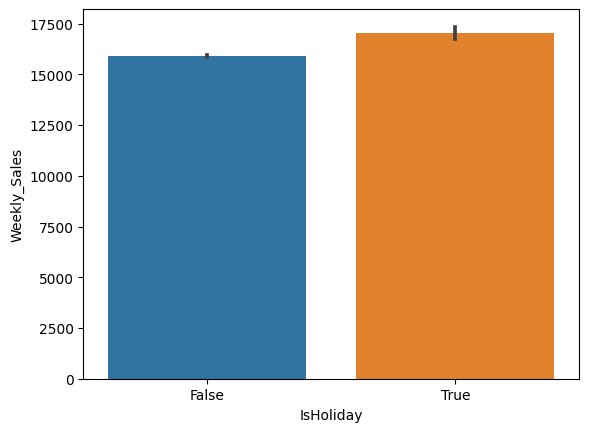

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_val_df);

Seems there are no such a difference in weekly **mean** sales between special holiday weeks and not.

> It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate. (source: https://seaborn.pydata.org/generated/seaborn.barplot.html)

So let's see the distribution using boxplot and boxenplot, in order to see outliers distributions too, that is not possible in a simple boxplot (for interpreting in the right way we reference https://seaborn.pydata.org/generated/seaborn.barplot.html).

In [ ]:
import matplotlib.pyplot as plt

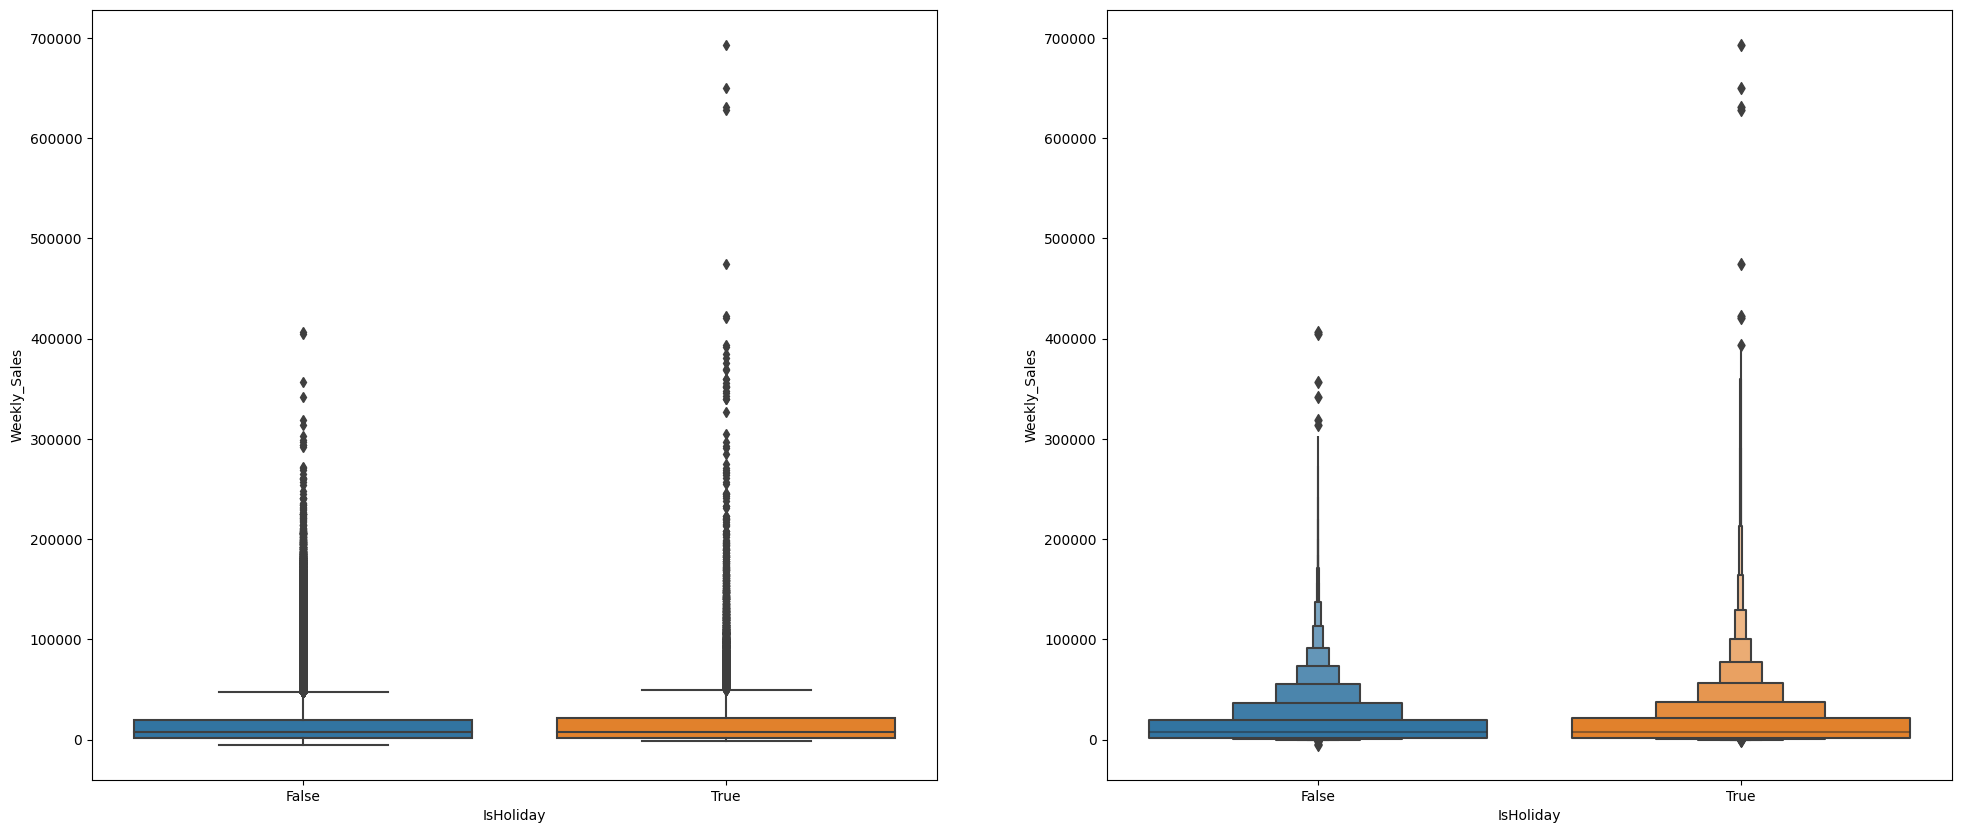

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
sns.boxplot(ax=axes[0], data=train_val_df, x='IsHoliday', y='Weekly_Sales');
sns.boxenplot(ax=axes[1], data=train_val_df, x='IsHoliday', y='Weekly_Sales');

In [ ]:
max_sales_no_holiday = train_val_df[(train_val_df["IsHoliday"] == False)]["Weekly_Sales"].max()

In [ ]:
num_upper_values = train_val_df[(train_val_df["IsHoliday"] == True) & (train_val_df["Weekly_Sales"] >= max_sales_no_holiday)].shape[0]

In [ ]:
num_upper_values

7

In [ ]:
num_upper_values/train_val_df.shape[0]*100

0.0016604597101311763

> **Obsvervations**:
- There's no great difference between `Weekly_Sales` in `isHoliday` == False and `isHoliday` == True, either in the mean and distribution
- There are only 7 values in `isHoliday` == True greater than the max value in `isHoliday` == False, that is 0.001% of the entire dataframe

**`Weekly_Sales` per `Temperature`**

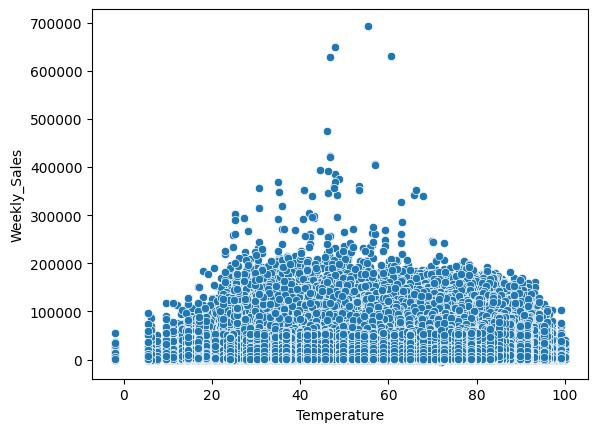

In [ ]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train_val_df);

> It seems when it's either too cold or too hot, there are lower sales.

**`Weekly_Sales` per `Fuel_Price`**

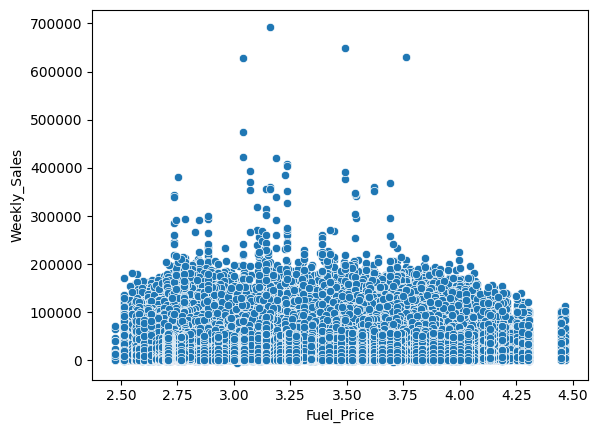

In [ ]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=train_val_df);

Same direction as previous.

**`Weekly_Sales` per `CPI`**

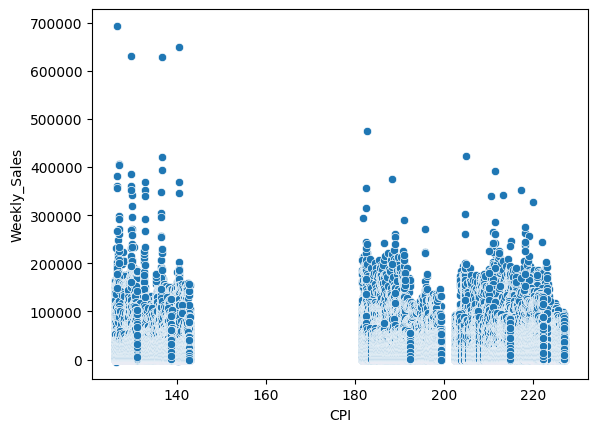

In [ ]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=train_val_df);

Same direction as previous.

**`Weekly_Sales` per `Unemployment`**

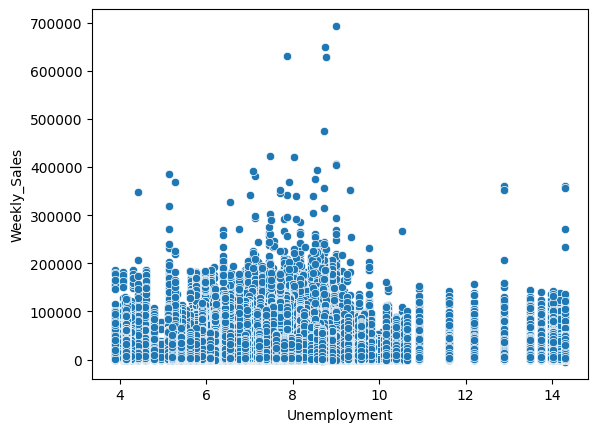

In [ ]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=train_val_df);

Same direction as previous.

**`Weekly_Sales` per `Type`**

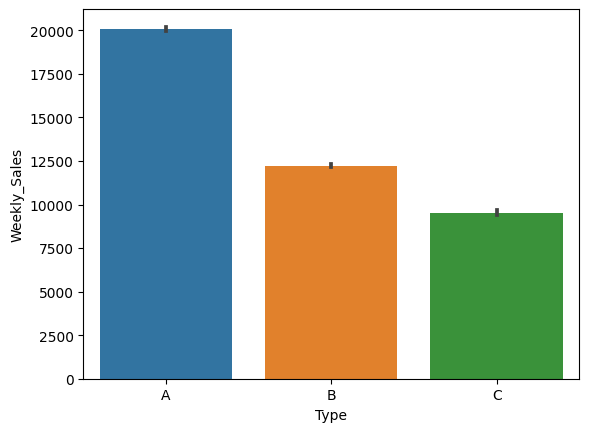

In [ ]:
sns.barplot(x='Type', y='Weekly_Sales', data=train_val_df);

> Seems that **Type A drove more `Weekly_Sales` than the other types**.

**`Weekly_Sales` per `Size`**

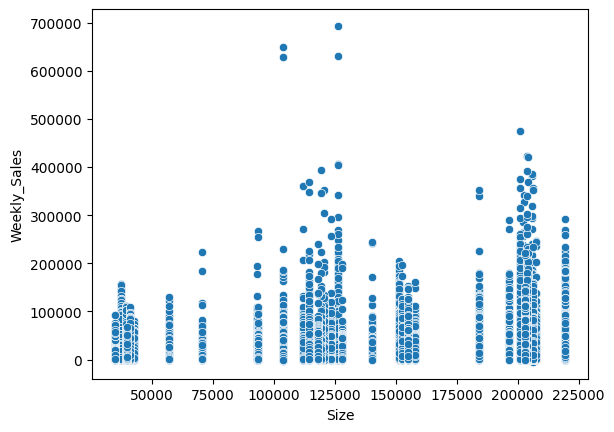

In [ ]:
sns.scatterplot(x='Size', y='Weekly_Sales', data=train_val_df);

> It seems that **larger stores tend to have higher weekly sales**.

**`Weekly_Sales` per `Week`**

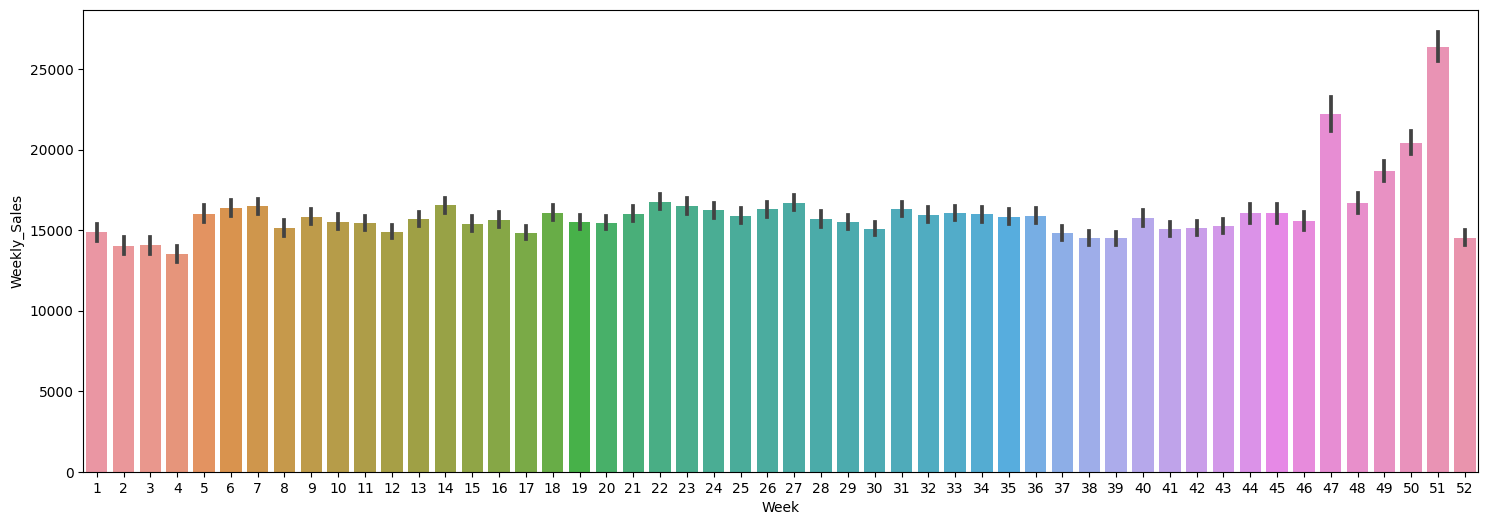

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Week', y='Weekly_Sales', data=train_val_df);

> **Higher sales in the last part of the year** (excluding the very last one week).

**`Weekly_Sales` per `Month`**

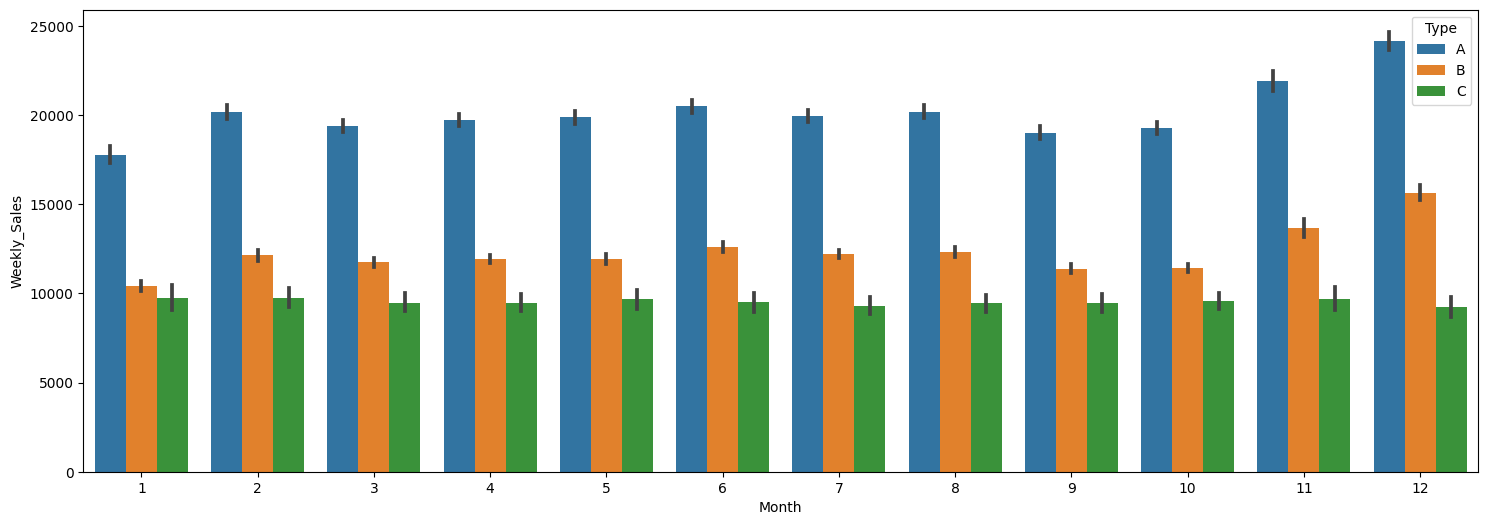

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=train_val_df, hue="Type");

> As we saw in the previous barplot, **November and December tend to have higher weekly sales**.

**`Weekly_Sales` per `Year`**

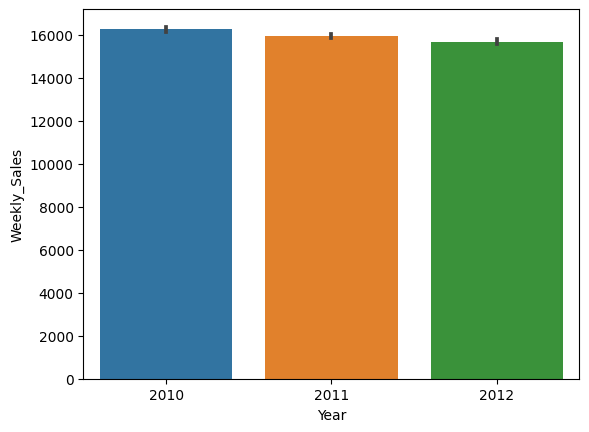

In [ ]:
sns.barplot(x='Year', y='Weekly_Sales', data=train_val_df);

No differences spotted between years in weekly sales mean.

> **Final observations:**
- `Type` and `Size` features maybe have an high correlation with the target `Weekly_Sales`
- At the end of November `Weekly_Sales` starts to grow (seems that is not for Type C stores)

**Correlation between variables**

<ipython-input-68-57916929047c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_val_df.corr(), annot=True);


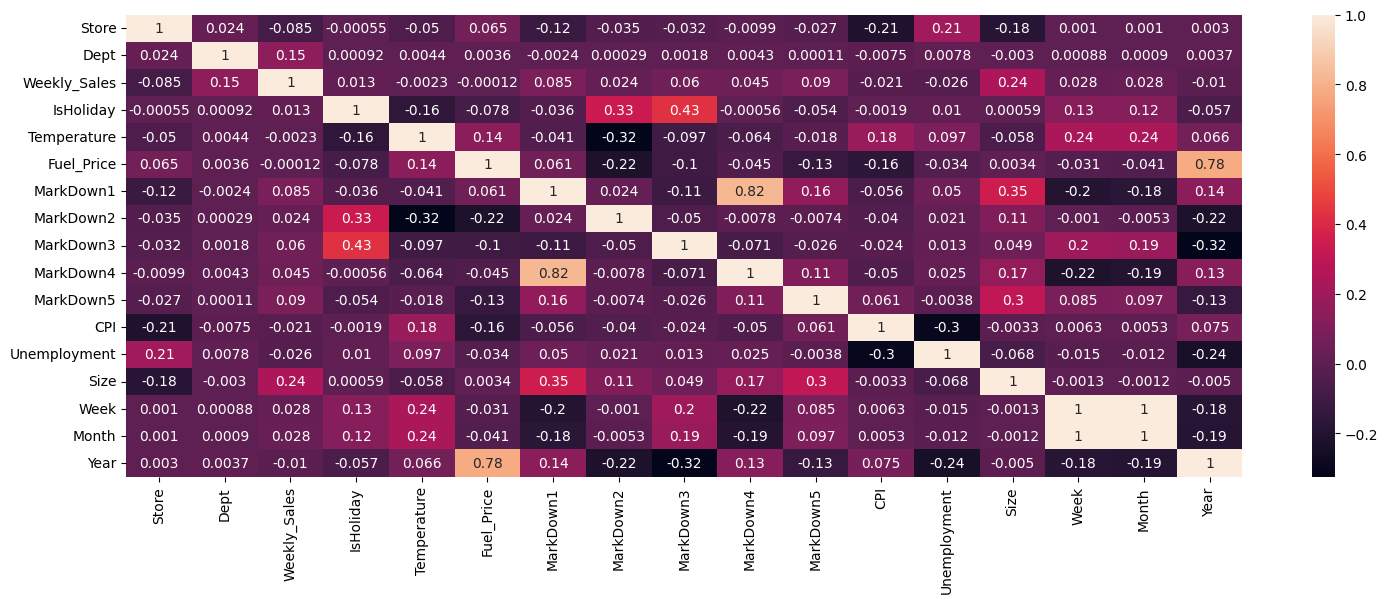

In [ ]:
plt.figure(figsize=(18, 6))
sns.heatmap(train_val_df.corr(), annot=True);

> **Observations**
- Seems that `Size` (as seen before) and `Dept` are best correlated with the target
- Markdown 1-5 are correlated with other features

## 4. Preparing the data for modelling

4.0 Split Training & Validation Set </br>
4.1 Work with 25% of data to speed up the process (probably WMAE is going to become higher, but my Mac can't handle well too much data) </br>
4.2 Selecting Input & Target cols </br>
4.3 Identifying numeric and categorical cols </br>
4.4 Imputing </br>
4.5 Scaling </br>
4.6 Encoding </br>
4.7 Save Intermediate DataFrames

### 4.0 Split Training & Validation Set

In [ ]:
test_df["Year"].value_counts()

2013    88275
2012    26789
Name: Year, dtype: int64

In [ ]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

> We'll use 2010 and 2011 for the train and 2012 for the val, cause 2012 is also present in the test set.

In [ ]:
train_df = train_val_df[train_val_df.Year < 2012]
val_df = train_val_df[train_val_df.Year == 2012]

In [ ]:
train_df.shape

(294132, 18)

In [ ]:
val_df.shape

(127438, 18)

### 4.1 Work with 25% of data

In [ ]:
train_df_reduced = train_df.sample(frac=0.25, random_state=42)

In [ ]:
val_df_reduced = val_df.sample(frac=0.25, random_state=42)

In [ ]:
train_df_reduced.shape

(73533, 18)

In [ ]:
val_df_reduced.shape

(31860, 18)

In [ ]:
test_df_reduced = test_df.sample(frac=0.25, random_state=42)

In [ ]:
test_df_reduced.shape

(28766, 17)

### 4.2 Selecting Input & Target cols

In [ ]:
train_df_reduced.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
153418,16,44,3943.79,True,56.99,3.566,NaN,NaN,NaN,NaN,NaN,194.638785,6.338,B,57197,36,9,2011
341318,36,26,226.96,False,81.88,2.602,NaN,NaN,NaN,NaN,NaN,210.128679,8.360,A,39910,30,7,2010
383665,41,52,1997.79,False,42.16,2.748,NaN,NaN,NaN,NaN,NaN,190.951728,7.508,A,196321,43,10,2010
303952,32,36,362.74,True,28.09,2.572,NaN,NaN,NaN,NaN,NaN,189.464272,9.014,A,203007,6,2,2010
365091,39,4,39553.22,False,65.28,3.488,NaN,NaN,NaN,NaN,NaN,213.109679,8.395,A,184109,11,3,2011


> Let's move the target to the end of the dataframe in order to ease the manipulation of data. </br> (hint: https://jovian.com/sergioalves94/walmart-store-sales-forecasting)

In [ ]:
train_weekly_sales = train_df_reduced.pop("Weekly_Sales")

In [ ]:
train_df_reduced["Weekly_Sales"] = train_weekly_sales

In [ ]:
train_df_reduced.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Weekly_Sales
153418,16,44,True,56.99,3.566,NaN,NaN,NaN,NaN,NaN,194.638785,6.338,B,57197,36,9,2011,3943.79
341318,36,26,False,81.88,2.602,NaN,NaN,NaN,NaN,NaN,210.128679,8.360,A,39910,30,7,2010,226.96
383665,41,52,False,42.16,2.748,NaN,NaN,NaN,NaN,NaN,190.951728,7.508,A,196321,43,10,2010,1997.79
303952,32,36,True,28.09,2.572,NaN,NaN,NaN,NaN,NaN,189.464272,9.014,A,203007,6,2,2010,362.74
365091,39,4,False,65.28,3.488,NaN,NaN,NaN,NaN,NaN,213.109679,8.395,A,184109,11,3,2011,39553.22


> Let's do the same with val_df_reduced.

In [ ]:
val_df_reduced.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
145579,15,55,6877.29,False,33.18,3.917,6881.03,5859.12,1.00,3607.57,4147.13,137.341103,7.943,B,123737,8,2,2012
196669,20,71,5776.91,False,74.73,3.654,31549.63,83.64,40.76,25656.34,3188.65,214.743351,7.280,A,203742,31,8,2012
369012,39,80,13289.91,False,71.59,3.891,5032.34,3521.71,15.90,1241.57,10538.44,220.195339,6.989,A,184109,15,4,2012
58262,6,71,5346.78,False,87.53,3.571,5433.03,171.64,0.01,4968.35,4940.37,223.651022,5.668,A,202505,33,8,2012
264476,27,3,11762.37,False,40.07,3.983,28652.29,3088.37,109.25,35364.08,4464.45,141.387536,8.009,A,204184,9,3,2012


In [ ]:
val_weekly_sales = val_df_reduced.pop("Weekly_Sales")

In [ ]:
val_df_reduced["Weekly_Sales"] = val_weekly_sales

In [ ]:
val_df_reduced.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Weekly_Sales
145579,15,55,False,33.18,3.917,6881.03,5859.12,1.00,3607.57,4147.13,137.341103,7.943,B,123737,8,2,2012,6877.29
196669,20,71,False,74.73,3.654,31549.63,83.64,40.76,25656.34,3188.65,214.743351,7.280,A,203742,31,8,2012,5776.91
369012,39,80,False,71.59,3.891,5032.34,3521.71,15.90,1241.57,10538.44,220.195339,6.989,A,184109,15,4,2012,13289.91
58262,6,71,False,87.53,3.571,5433.03,171.64,0.01,4968.35,4940.37,223.651022,5.668,A,202505,33,8,2012,5346.78
264476,27,3,False,40.07,3.983,28652.29,3088.37,109.25,35364.08,4464.45,141.387536,8.009,A,204184,9,3,2012,11762.37


In [ ]:
input_cols, target_col = train_df_reduced.columns[:-1], train_df_reduced.columns[-1]

In [ ]:
input_cols

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'],
      dtype='object')

In [ ]:
target_col

'Weekly_Sales'

In [ ]:
train_inputs = train_df_reduced[input_cols].copy()
train_targets = train_df_reduced[target_col].copy()

In [ ]:
val_inputs = val_df_reduced[input_cols].copy()
val_targets = val_df_reduced[target_col].copy()

In [ ]:
test_inputs = test_df_reduced[input_cols].copy()

In [ ]:
train_inputs.shape

(73533, 17)

In [ ]:
val_inputs.shape

(31860, 17)

In [ ]:
test_inputs.shape

(28766, 17)

### 4.3 Identifying numeric and categorical cols

Firs of all, we'll convert `IsHoliday` of boolean values to a column of integers 1 or 0. </br> (hint: https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe)

In [ ]:
train_inputs["IsHoliday"] = train_inputs["IsHoliday"].astype(int)
val_inputs["IsHoliday"] = val_inputs["IsHoliday"].astype(int)
test_inputs["IsHoliday"] = test_inputs["IsHoliday"].astype(int)

In [ ]:
train_inputs.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
153418,16,44,1,56.99,3.566,NaN,NaN,NaN,NaN,NaN,194.638785,6.338,B,57197,36,9,2011
341318,36,26,0,81.88,2.602,NaN,NaN,NaN,NaN,NaN,210.128679,8.360,A,39910,30,7,2010
383665,41,52,0,42.16,2.748,NaN,NaN,NaN,NaN,NaN,190.951728,7.508,A,196321,43,10,2010


In [ ]:
val_inputs.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
145579,15,55,0,33.18,3.917,6881.03,5859.12,1.00,3607.57,4147.13,137.341103,7.943,B,123737,8,2,2012
196669,20,71,0,74.73,3.654,31549.63,83.64,40.76,25656.34,3188.65,214.743351,7.280,A,203742,31,8,2012
369012,39,80,0,71.59,3.891,5032.34,3521.71,15.90,1241.57,10538.44,220.195339,6.989,A,184109,15,4,2012


In [ ]:
test_inputs.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
41889,16,29,0,32.66,3.642,1777.31,17.29,27.59,157.47,1318.61,201.070571,5.324,B,57197,15,4,2013
94849,37,31,0,49.08,3.161,549.39,653.58,3.32,NaN,757.64,222.744266,6.266,C,39910,1,1,2013
47097,18,50,0,39.18,3.796,11246.27,NaN,314.52,254.90,1273.15,138.991194,7.942,B,120653,13,3,2013


In [ ]:
numeric_cols = ['Temperature', 'Fuel_Price',
                'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                'CPI', 'Unemployment', 'Size']

Since Markdown 1-5 are anonymized data we preferred to consider them as numeric cols, not to create too much cols too.

In [ ]:
categorical_cols = ['Store', 'Dept', 'Type', 'Week', 'Month', 'Year']

### 4.4 Imputing

In [ ]:
from sklearn.impute import SimpleImputer

**train**

In [ ]:
train_inputs.isna().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       67599
MarkDown2       68479
MarkDown3       67768
MarkDown4       68287
MarkDown5       67521
CPI                 0
Unemployment        0
Type                0
Size                0
Week                0
Month               0
Year                0
dtype: int64

In [ ]:
train_imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = train_imputer.transform(train_inputs[numeric_cols])

In [ ]:
train_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Month           0
Year            0
dtype: int64

**val**

In [ ]:
val_inputs.isna().sum()

Store              0
Dept               0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1         95
MarkDown2       9056
MarkDown3       3273
MarkDown4       3317
MarkDown5          0
CPI                0
Unemployment       0
Type               0
Size               0
Week               0
Month              0
Year               0
dtype: int64

In [ ]:
val_inputs[numeric_cols] = train_imputer.transform(val_inputs[numeric_cols])

In [ ]:
val_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Month           0
Year            0
dtype: int64

**test**

In [ ]:
test_inputs.isna().sum()

Store              0
Dept               0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1         37
MarkDown2       7192
MarkDown3       2484
MarkDown4       3257
MarkDown5          0
CPI             9457
Unemployment    9457
Type               0
Size               0
Week               0
Month              0
Year               0
dtype: int64

In [ ]:
test_inputs[numeric_cols] = train_imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Month           0
Year            0
dtype: int64

### 4.5 Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = train_scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = train_scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = train_scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
153418,16,44,1,0.577789,0.629097,0.131799,0.073173,0.058643,0.072605,0.164551,0.705606,0.193874,B,0.120825,36,9,2011
341318,36,26,0,0.821331,0.074756,0.131799,0.073173,0.058643,0.072605,0.164551,0.864990,0.398261,A,0.027253,30,7,2010
383665,41,52,0,0.432681,0.158712,0.131799,0.073173,0.058643,0.072605,0.164551,0.667668,0.312140,A,0.873876,43,10,2010
303952,32,36,1,0.295010,0.057504,0.131799,0.073173,0.058643,0.072605,0.164551,0.652362,0.464369,A,0.910066,6,2,2010
365091,39,4,0,0.658904,0.584244,0.131799,0.073173,0.058643,0.072605,0.164551,0.895664,0.401799,A,0.807775,11,3,2011


In [ ]:
val_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
145579,15,55,0,0.344814,0.830937,0.200320,0.056058,0.000013,0.173075,0.107140,0.116037,0.356110,B,0.480993,8,2,2012
196669,20,71,0,0.751370,0.679701,0.918524,0.000800,0.000294,1.231465,0.081544,0.912473,0.289093,A,0.914045,31,8,2012
369012,39,80,0,0.720646,0.815986,0.146497,0.033694,0.000118,0.059502,0.277820,0.968572,0.259679,A,0.807775,15,4,2012
58262,6,71,0,0.876614,0.631972,0.158163,0.001642,0.000006,0.238396,0.128323,1.004130,0.126150,A,0.907349,33,8,2012
264476,27,3,0,0.412231,0.868890,0.834171,0.029548,0.000778,1.697458,0.115614,0.157673,0.362782,A,0.916437,9,3,2012


In [ ]:
test_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
41889,16,29,0,0.339726,0.672800,0.051730,0.000165,0.000201,0.007463,0.031604,0.771786,0.091378,B,0.120825,15,4,2013
94849,37,31,0,0.500391,0.396205,0.015980,0.006253,0.000030,0.072605,0.016623,0.994800,0.186597,C,0.027253,1,1,2013
47097,18,50,0,0.403523,0.761357,0.327410,0.073173,0.002227,0.012140,0.030390,0.133015,0.356009,B,0.464300,13,3,2013
76656,29,31,0,0.395597,0.812536,0.070735,0.003136,0.000015,0.005915,0.012387,0.131752,0.458001,B,0.318073,9,3,2013
25182,10,96,0,0.491487,0.780909,0.504731,0.003103,0.000020,0.027818,0.038284,0.064861,0.250379,B,0.496013,9,3,2013


In [ ]:
train_inputs.describe().loc[['min', 'max']][numeric_cols]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
val_inputs.describe().loc[['min', 'max']][numeric_cols]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
min,0.093151,0.321449,-0.000007,-0.002543,-0.000199,-0.000085,0.000477,0.042121,-0.054685,0.0
max,0.999315,1.147786,2.580854,0.439836,0.058643,3.238847,2.894403,1.040985,0.785101,1.0


In [ ]:
test_inputs.describe().loc[['min', 'max']][numeric_cols]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
min,-0.051174,0.230017,-0.080994,-0.000342,-0.001260,-0.000085,-0.008554,0.053220,-0.074396,0.0
max,1.017710,0.950546,3.004121,0.680008,1.055445,3.136592,20.597946,1.058926,0.584150,1.0


> **Observations**
- In `val_inputs` and `test_inputs` we have values less than the min in `train_inputs` and values greater than the max in the same df, so it is not surprising that MinMaxScaler return these kind of values
- IMPORTANT: "The problem can occur when we train a linear regressor, which multiplies scaled features with coefficients." (source: https://towardsdatascience.com/dont-make-this-mistake-with-scaling-data-f39435eb71d2)

### 4.6 Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

Let's ensure we are considering all features classes (hint: https://jovian.com/wagb2b2/course-project-forecasting-walmart-sales)

In [ ]:
full_inputs_df = pd.concat([train_inputs, val_inputs, test_inputs])

In [ ]:
full_encoder = OneHotEncoder(sparse=False).fit(full_inputs_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_cols = list(full_encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

['Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45',
 'Dept_1',
 'Dept_2',
 'Dept_3',
 'Dept_4',
 'Dept_5',
 'Dept_6',
 'Dept_7',
 'Dept_8',
 'Dept_9',
 'Dept_10',
 'Dept_11',
 'Dept_12',
 'Dept_13',
 'Dept_14',
 'Dept_16',
 'Dept_17',
 'Dept_18',
 'Dept_19',
 'Dept_20',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_31',
 'Dept_32',
 'Dept_33',
 'Dept_34',
 'Dept_35',
 'Dept_36',
 'Dept_37',
 

In [ ]:
train_inputs[encoded_cols] = full_encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = full_encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = full_encoder.transform(test_inputs[categorical_cols])

<ipython-input-73-b68b5ea763db>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = full_encoder.transform(train_inputs[categorical_cols])
<ipython-input-73-b68b5ea763db>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = full_encoder.transform(train_inputs[categorical_cols])
<ipython-input-73-b68b5ea763db>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

In [ ]:
train_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
153418,16,44,1,0.577789,0.629097,0.131799,0.073173,0.058643,0.072605,0.164551,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
341318,36,26,0,0.821331,0.074756,0.131799,0.073173,0.058643,0.072605,0.164551,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383665,41,52,0,0.432681,0.158712,0.131799,0.073173,0.058643,0.072605,0.164551,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
303952,32,36,1,0.295010,0.057504,0.131799,0.073173,0.058643,0.072605,0.164551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365091,39,4,0,0.658904,0.584244,0.131799,0.073173,0.058643,0.072605,0.164551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
val_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
145579,15,55,0,0.344814,0.830937,0.200320,0.056058,0.000013,0.173075,0.107140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196669,20,71,0,0.751370,0.679701,0.918524,0.000800,0.000294,1.231465,0.081544,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369012,39,80,0,0.720646,0.815986,0.146497,0.033694,0.000118,0.059502,0.277820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58262,6,71,0,0.876614,0.631972,0.158163,0.001642,0.000006,0.238396,0.128323,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
264476,27,3,0,0.412231,0.868890,0.834171,0.029548,0.000778,1.697458,0.115614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test_inputs.head(5)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
41889,16,29,0,0.339726,0.672800,0.051730,0.000165,0.000201,0.007463,0.031604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94849,37,31,0,0.500391,0.396205,0.015980,0.006253,0.000030,0.072605,0.016623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47097,18,50,0,0.403523,0.761357,0.327410,0.073173,0.002227,0.012140,0.030390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76656,29,31,0,0.395597,0.812536,0.070735,0.003136,0.000015,0.005915,0.012387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25182,10,96,0,0.491487,0.780909,0.504731,0.003103,0.000020,0.027818,0.038284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


> To finish data preparation for modelling, I will drop all the categorical column from the dataframes I'll use for training ML models, because I already have the encoded ones.

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
extracted_col_train = train_inputs["IsHoliday"]
X_train.insert(2,"IsHoliday",extracted_col_train)

X_val = val_inputs[numeric_cols + encoded_cols]
extracted_col_val = val_inputs["IsHoliday"]
X_val.insert(2,"IsHoliday",extracted_col_val)

X_test = test_inputs[numeric_cols + encoded_cols]
extracted_col_test = test_inputs["IsHoliday"]
X_test.insert(2,"IsHoliday",extracted_col_test)

In [ ]:
X_train.head(5)

,Temperature,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
153418,0.577789,0.629097,1,0.131799,0.073173,0.058643,0.072605,0.164551,0.705606,0.193874,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
341318,0.821331,0.074756,0,0.131799,0.073173,0.058643,0.072605,0.164551,0.864990,0.398261,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383665,0.432681,0.158712,0,0.131799,0.073173,0.058643,0.072605,0.164551,0.667668,0.312140,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
303952,0.295010,0.057504,1,0.131799,0.073173,0.058643,0.072605,0.164551,0.652362,0.464369,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365091,0.658904,0.584244,0,0.131799,0.073173,0.058643,0.072605,0.164551,0.895664,0.401799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_val.head(5)

,Temperature,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
145579,0.344814,0.830937,0,0.200320,0.056058,0.000013,0.173075,0.107140,0.116037,0.356110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196669,0.751370,0.679701,0,0.918524,0.000800,0.000294,1.231465,0.081544,0.912473,0.289093,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369012,0.720646,0.815986,0,0.146497,0.033694,0.000118,0.059502,0.277820,0.968572,0.259679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58262,0.876614,0.631972,0,0.158163,0.001642,0.000006,0.238396,0.128323,1.004130,0.126150,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
264476,0.412231,0.868890,0,0.834171,0.029548,0.000778,1.697458,0.115614,0.157673,0.362782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head(5)

,Temperature,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013
41889,0.339726,0.672800,0,0.051730,0.000165,0.000201,0.007463,0.031604,0.771786,0.091378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94849,0.500391,0.396205,0,0.015980,0.006253,0.000030,0.072605,0.016623,0.994800,0.186597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47097,0.403523,0.761357,0,0.327410,0.073173,0.002227,0.012140,0.030390,0.133015,0.356009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76656,0.395597,0.812536,0,0.070735,0.003136,0.000015,0.005915,0.012387,0.131752,0.458001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25182,0.491487,0.780909,0,0.504731,0.003103,0.000020,0.027818,0.038284,0.064861,0.250379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4.7 Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

In [ ]:
X_train.to_parquet('x_train.parquet')

In [ ]:
X_val.to_parquet("x_val.parquet")

In [ ]:
X_test.to_parquet("x_test.parquet")

**READ THEM**

In [ ]:
X_train = pd.read_parquet("x_train.parquet", engine="auto")

In [ ]:
X_val = pd.read_parquet("x_val.parquet", engine="auto")

In [ ]:
X_test = pd.read_parquet("x_test.parquet", engine="auto")

## 5. Train, evaluate and improve 2 different types of machine learning models
5.1 Random Forest Regressor </br>
5.2 XGBRegressor

### 5.1 Random Forest Regressor

First, we will train a Random Forest Regressor Model without tuning any hyperparams. Then, based on the error scores of this model on the training and validation datasets, we will tune at least 2 hyperparameters of the model to minimize the error of the validation dataset for predicting weekly sales.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rand_forest1 = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
%%time
rand_forest1.fit(X_train, train_targets)

CPU times: user 8min 35s, sys: 817 ms, total: 8min 36s
Wall time: 5min 5s


RandomForestRegressor(n_jobs=-1, random_state=42)

The model was fitted to the training dataset. Now we will calculate the training error and the validation error of this model, based on the difference between the values predicted by the model versus the real values of weekly sales.

Remember that, as seen in Dataset Description on https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data:

> "The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks"

So, in order to follow the istructions, we have to **assign different weights to rows in the DataFrame based on the value of the `IsHoliday`**.

To do that, we took inspiration from https://www.kaggle.com/code/avelinocaio/walmart-store-sales-forecasting/notebook

In [ ]:
weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)

In [ ]:
import numpy as np

In [ ]:
train_wmae = np.sum(np.multiply(abs(train_targets - rand_forest1.predict(X_train)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - rand_forest1.predict(X_val)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(790.8752945000356, 2459.040643181579)

In summary, the line of code calculates the WMAE for the Random Forest model based on predictions made on the training data. The absolute error between the model's predictions and the target values is multiplied by the corresponding training weights. Then, the sum of the results is divided by the sum of the training weights to obtain the WMAE. This metric takes into account the weighted errors based on the importance of different examples during the model training.

#### Tuning

**Hints**:

source: https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76

> Here’s a strategy for tuning hyperparameters:
- Tune the most important/impactful hyperparameter first e.g. n_estimators
- With the best value of the first hyperparameter, tune the next most impactful hyperparameter, for ex. max_depth

These helper functions below will help us tune the hyperparameters (credit: Jovian):

In [ ]:
def test_param(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(X_train)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(X_val)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
import matplotlib.pyplot as plt

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_wmae, val_wmae = test_param(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
}

**`n_estimators`** (default = 100)

CPU times: user 46min 2s, sys: 5.47 s, total: 46min 7s
Wall time: 27min 18s


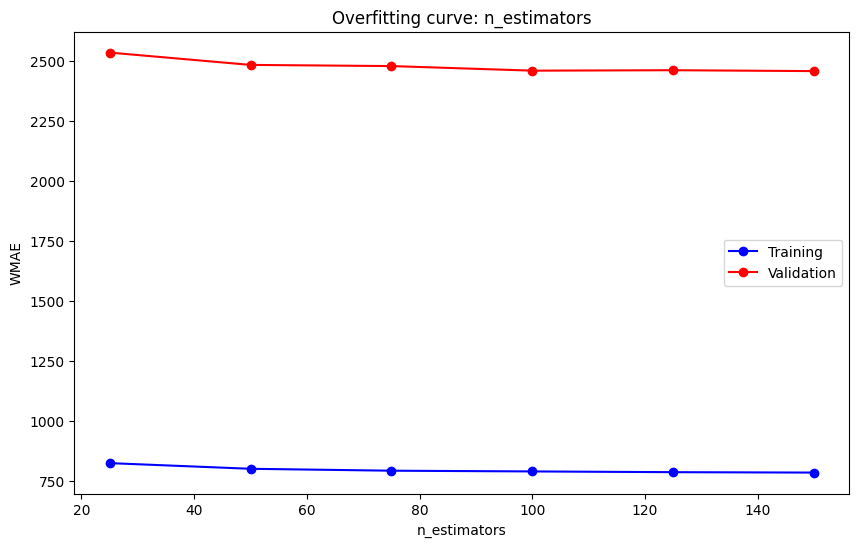

In [ ]:
%%time
test_param_and_plot(RandomForestRegressor, 'n_estimators', [25,50,75,100,125,150], **best_params)

**`max_depth`** (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples) </br>
source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

CPU times: user 26min 57s, sys: 2.98 s, total: 27min
Wall time: 15min 59s


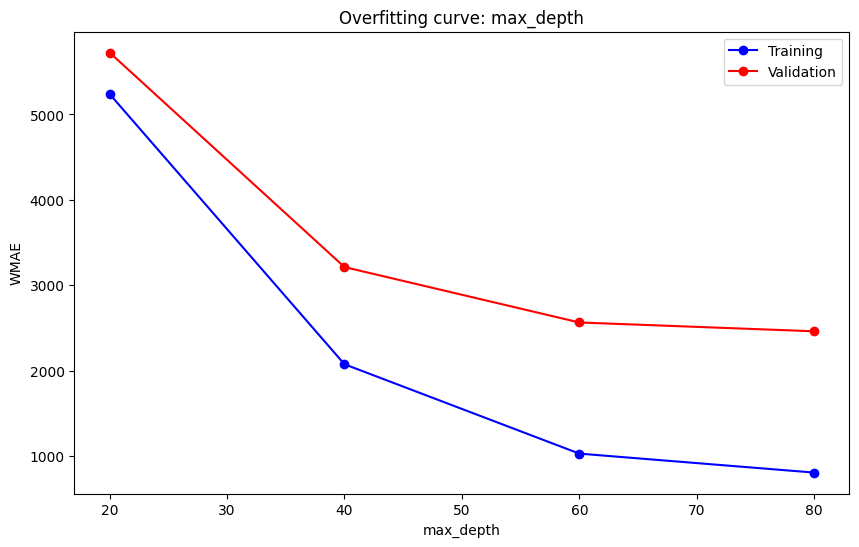

In [ ]:
%%time
test_param_and_plot(RandomForestRegressor, 'max_depth', [20,40,60,80], **best_params)

In [ ]:
best_params['max_depth'] = 80

> **Let's fit the final RandomForestRegressor model and evaluate performances**

In [ ]:
rfr_model_final = RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=80)

In [ ]:
test_param(max_depth=80)

(807.2968210215065, 2460.4706171483035)

> The best model is the first one we trained, with no manual hyperparams.

Analyzing the feature importances for the final random forest model

In [ ]:
importances_rf_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rand_forest1.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importances_rf_df

,feature,importance
10,Size,1.944813e-01
129,Dept_92,9.141669e-02
132,Dept_95,8.331623e-02
92,Dept_38,5.985845e-02
116,Dept_72,4.551566e-02
...,...,...
119,Dept_78,1.151602e-06
93,Dept_39,8.734133e-08
97,Dept_43,3.609732e-08
206,Year_2012,0.000000e+00


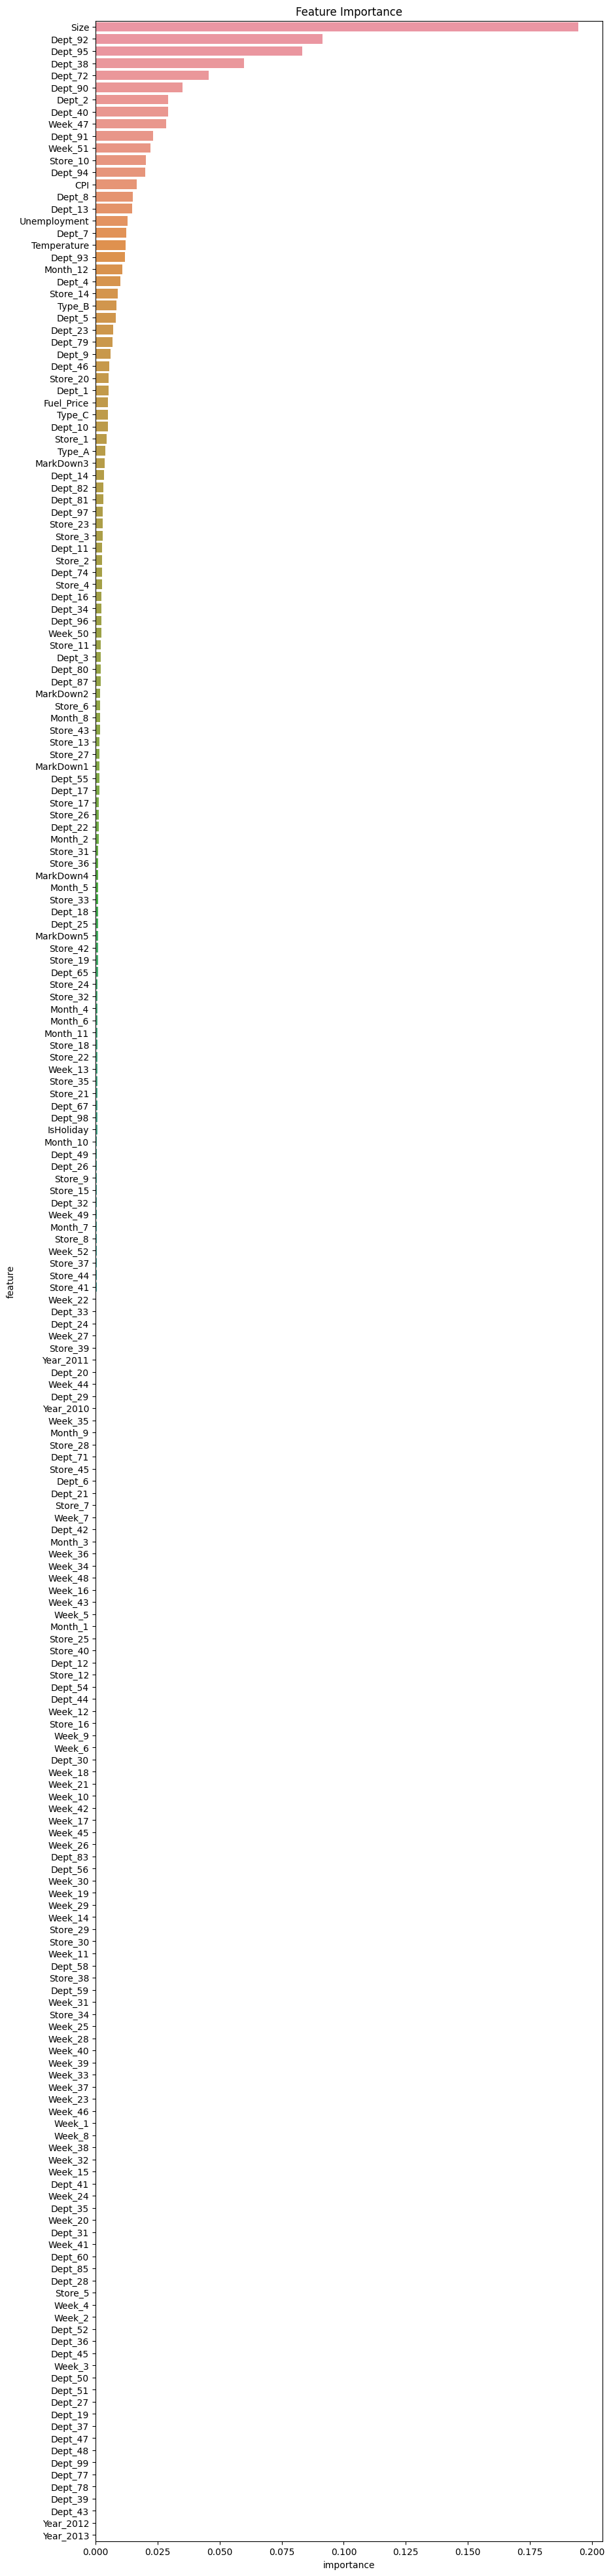

In [ ]:
plt.figure(figsize=(10,50))
plt.title('Feature Importance')
sns.barplot(data=importances_rf_df, x='importance', y='feature');

> **Size is by far the most important factor in predicting weekly sales.**

### 5.2 XGBRegressor

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb1 = XGBRegressor(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [ ]:
weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)

In [ ]:
train_wmae = np.sum(np.multiply(abs(train_targets - xgb1.predict(X_train)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - xgb1.predict(X_val)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(3275.0370353822223, 3642.2585705891966)

In [ ]:
def test_param_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(X_train)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(X_val)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot_xgb(param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_wmae, val_wmae = test_param_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {

}

#### Tuning

**`n_estimators`**

CPU times: user 13min 33s, sys: 1.64 s, total: 13min 34s
Wall time: 8min


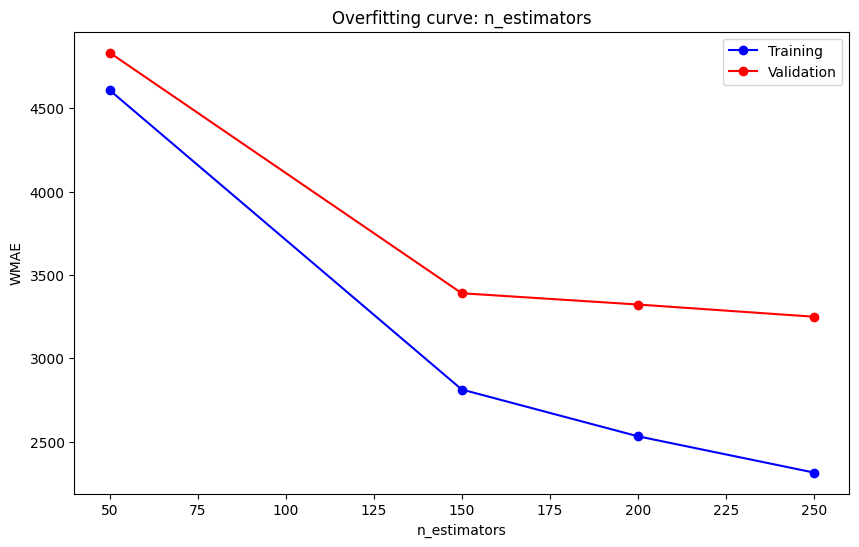

In [ ]:
%%time
test_param_and_plot_xgb('n_estimators', [50, 150, 200, 250])

The best value seems to be 150.

In [ ]:
best_params['n_estimators'] = 150

In [ ]:
best_params

{'n_estimators': 150}

**`max_depth`**

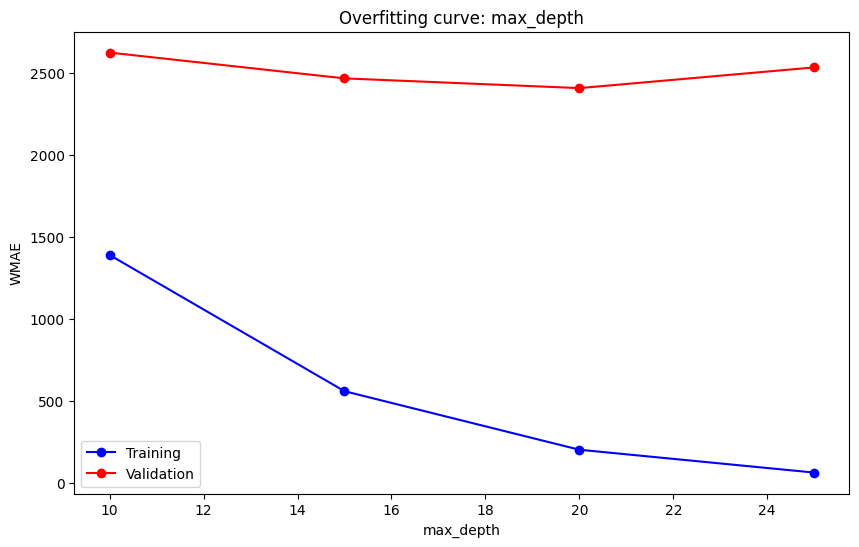

In [ ]:
test_param_and_plot_xgb('max_depth', [10, 15, 20, 25], **best_params)

20 seems to be the best value.

> **Let's fit the final XGBRegressor model and evaluate performances**

In [ ]:
test_param_xgb(n_estimators=150, max_depth=20)

(202.78499732781688, 2407.774427732303)

In [ ]:
xgb_model_final = XGBRegressor(n_estimators=150, max_depth=20).fit(X_train, train_targets)

In [ ]:
importances_xgb_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model_final.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importances_xgb_df

,feature,importance
132,Dept_95,0.223890
116,Dept_72,0.098056
94,Dept_40,0.061358
129,Dept_92,0.057419
92,Dept_38,0.037408
...,...,...
23,Store_13,0.000000
15,Store_5,0.000000
205,Year_2011,0.000000
206,Year_2012,0.000000


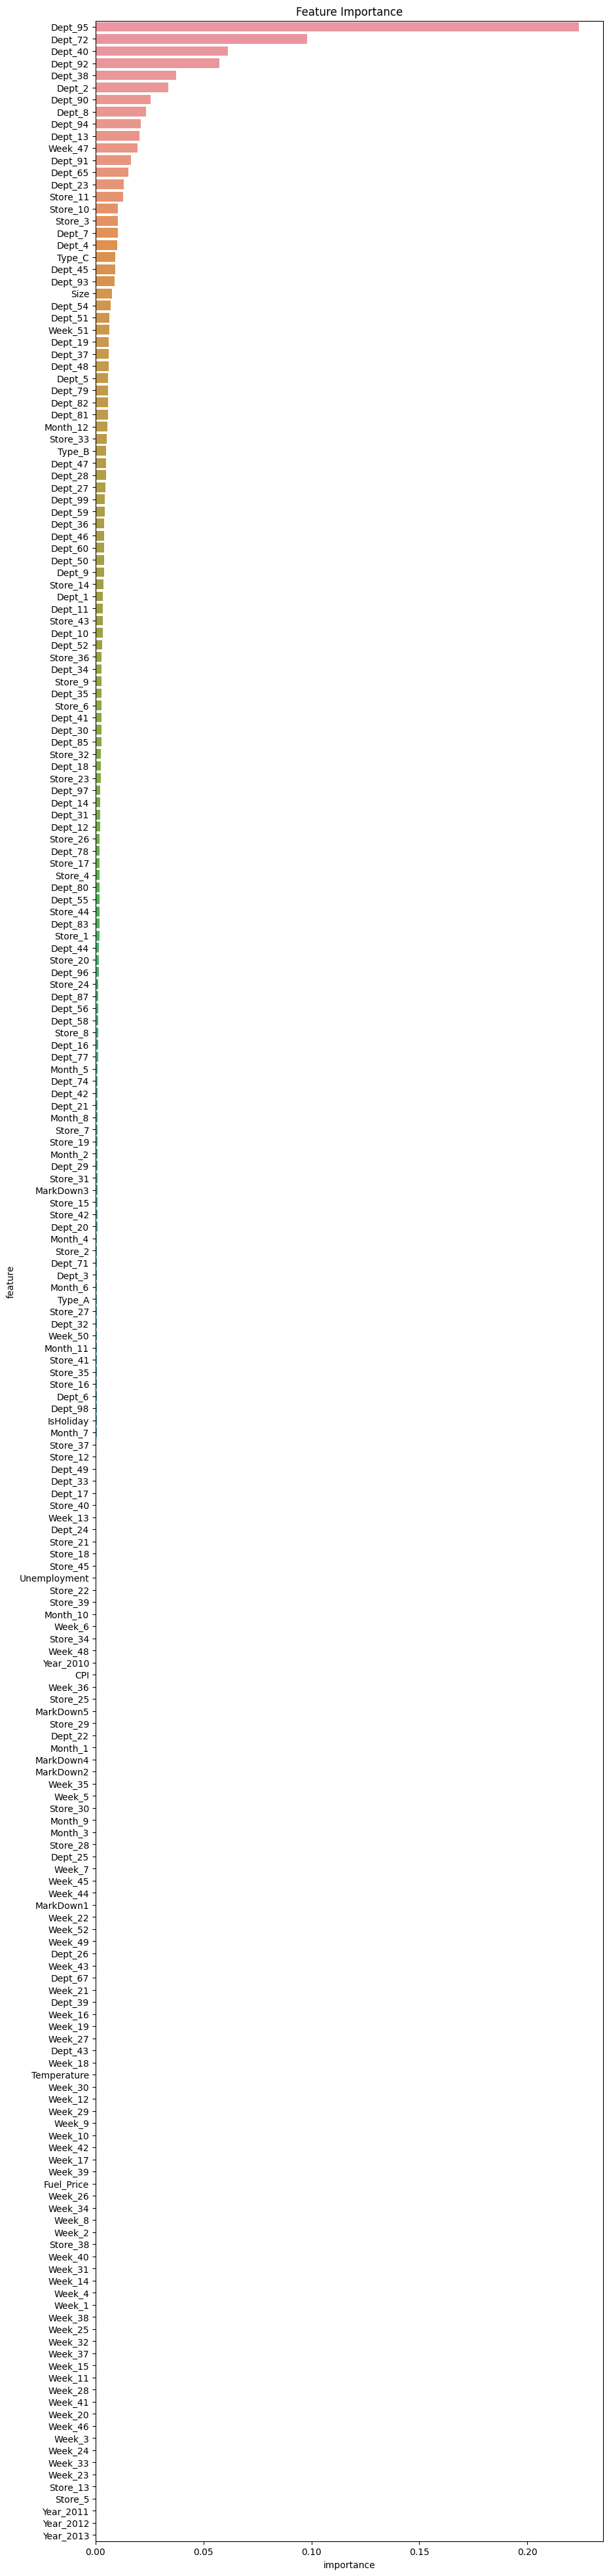

In [ ]:
plt.figure(figsize=(10,50))
plt.title('Feature Importance')
sns.barplot(data=importances_xgb_df, x='importance', y='feature');

> **Belonging to some Dept is by far the most important factor in predicting weekly sales.**

## 6. Report and Predict

> The best model is the last one we trained, a XGBRegressor fine tuned called `xgb_model_final`.

This model has a training error of 202.78 and a validation error of 2.407.77 on the prediction of the weekly sales.

To predict weekly sales on test dataset we'll use model mentioned above, then we will add a column on the DataFrame with the predicted sales, and save it.

In [ ]:
X_test['Predicted_sales'] = xgb_model_final.predict(X_test)
X_test.head(15)

,Temperature,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Year_2013,Predicted_sales
41889,0.339726,0.672800,0,0.051730,1.654236e-04,0.000201,0.007463,0.031604,0.771786,0.091378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2262.954834
94849,0.500391,0.396205,0,0.015980,6.253185e-03,0.000030,0.072605,0.016623,0.994800,0.186597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-496.742493
47097,0.403523,0.761357,0,0.327410,7.317257e-02,0.002227,0.012140,0.030390,0.133015,0.356009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3157.375000
76656,0.395597,0.812536,0,0.070735,3.136064e-03,0.000015,0.005915,0.012387,0.131752,0.458001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1337.601807
25182,0.491487,0.780909,0,0.504731,3.102865e-03,0.000020,0.027818,0.038284,0.064861,0.250379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13806.785156
16398,0.295108,0.554342,0,0.111773,7.317257e-02,0.104762,0.004161,0.157857,0.756283,0.317093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1545.004883
17799,0.310763,0.650374,0,0.050254,2.870277e-07,0.000209,0.008932,0.026570,0.771786,0.256040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2331.283203
7031,0.664873,0.638873,0,0.280912,1.229473e-02,0.002239,0.003046,0.018705,1.055494,0.159608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7392.977539
56914,0.434149,0.671075,0,0.052346,7.317257e-02,0.000380,0.037188,0.047427,0.168211,0.315678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1796.083130
93741,0.650294,0.565267,0,0.004361,7.317257e-02,0.058643,0.072605,0.005116,1.006037,0.174164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.288252


Let's save on GDrive folder.

In [ ]:
X_test.to_csv('Predictions.csv')

Let's save model weights too.

In [ ]:
import joblib

In [ ]:
joblib.dump(xgb_model_final, 'xgb_model_weights.joblib')

['xgb_model_weights.joblib']

## 7. Ideas for future work

- Improve the pipeline writing my own functions
- PCA for numerical continous variables
- Test other hyperparameters
- Test other model

## 8. References quoted in the notebook

- Barplot:
 - https://crystalcove.org/wp-content/uploads/2020/04/Calculating-Confidence-Intervals-Instructions.pdf
 - https://seaborn.pydata.org/generated/seaborn.barplot.html
- Scaling:
 - https://towardsdatascience.com/dont-make-this-mistake-with-scaling-data-f39435eb71d2
- Tuning:
 - https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Data manipulation:
 - https://jovian.com/sergioalves94/walmart-store-sales-forecasting
 - https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
- Encoding:
 - https://jovian.com/wagb2b2/course-project-forecasting-walmart-sales